In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing(download_if_missing=True)

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
import pandas as pd
df= pd.DataFrame(data.data, columns = data.feature_names)

In [6]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

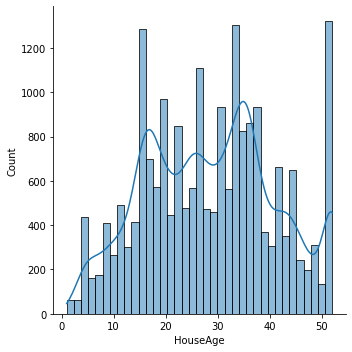

In [7]:
import seaborn as sns
sns.displot(df.HouseAge, kde =True)

In [8]:
import numpy as np
bins = np.arange(0,56,5)

In [9]:
bins

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

In [10]:
#transformation
df['HouseAge'] = pd.cut(df.HouseAge, bins=bins)

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,"(40, 45]",6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,"(20, 25]",6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,"(50, 55]",8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,"(50, 55]",5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,"(50, 55]",6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,"(20, 25]",5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,"(15, 20]",6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,"(15, 20]",5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,"(15, 20]",5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
#Onehotencoder

In [13]:
df= pd.get_dummies(df, columns =['HouseAge'])

In [14]:
df

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"HouseAge_(0, 5]","HouseAge_(5, 10]","HouseAge_(10, 15]","HouseAge_(15, 20]","HouseAge_(20, 25]","HouseAge_(25, 30]","HouseAge_(30, 35]","HouseAge_(35, 40]","HouseAge_(40, 45]","HouseAge_(45, 50]","HouseAge_(50, 55]"
0,8.3252,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,0,0,0,0,0,0,1,0,0
1,8.3014,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,0,0,1,0,0,0,0,0,0
2,7.2574,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,0,0,0,0,0,0,0,0,1
3,5.6431,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,0,0,0,0,0,0,0,0,1
4,3.8462,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0,0,0,0,1,0,0,0,0,0,0
20636,2.5568,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0,0,0,1,0,0,0,0,0,0,0
20637,1.7000,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0,0,0,1,0,0,0,0,0,0,0
20638,1.8672,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0,0,0,1,0,0,0,0,0,0,0


In [16]:
#Splitting
from sklearn.model_selection import train_test_split

In [17]:
y= data.target
x_train, x_test,y_train,y_test= train_test_split(df,y, test_size = 0.3,random_state =32)
x_train

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,"HouseAge_(0, 5]","HouseAge_(5, 10]","HouseAge_(10, 15]","HouseAge_(15, 20]","HouseAge_(20, 25]","HouseAge_(25, 30]","HouseAge_(30, 35]","HouseAge_(35, 40]","HouseAge_(40, 45]","HouseAge_(45, 50]","HouseAge_(50, 55]"
6363,3.6806,4.709821,1.026786,1890.0,4.218750,34.13,-117.98,0,0,0,0,0,1,0,0,0,0,0
10305,6.6678,7.692308,1.017094,871.0,3.722222,33.88,-117.78,0,0,0,1,0,0,0,0,0,0,0
15724,2.8654,5.342466,1.203957,1703.0,2.592085,37.78,-122.44,0,0,0,0,0,0,0,0,0,0,1
17592,4.4375,5.710345,1.041379,446.0,3.075862,37.30,-121.91,0,0,0,0,0,0,0,0,1,0,0
1234,4.4063,28.757282,5.300971,252.0,2.446602,38.26,-120.33,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19527,2.7917,4.732258,1.058065,673.0,2.170968,37.64,-120.96,0,0,0,0,0,0,0,0,1,0,0
20414,3.5504,4.302564,1.065934,3089.0,2.263004,34.18,-118.85,0,0,1,0,0,0,0,0,0,0,0
9526,1.7813,4.356436,1.000000,1048.0,3.458746,39.13,-123.16,0,0,0,0,0,0,1,0,0,0,0
9771,3.3289,5.580488,1.290244,1449.0,3.534146,36.38,-121.40,0,0,0,0,0,0,0,1,0,0,0


In [19]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(x_train) #Fit garne bhaneko Xmaz and Xmin patta lagaune ho
MinMaxScaler()

MinMaxScaler()

In [23]:
scaler.__dict__

{'feature_range': (0, 1),
 'copy': True,
 'clip': False,
 'feature_names_in_': array(['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'HouseAge_(0, 5]', 'HouseAge_(5, 10]',
        'HouseAge_(10, 15]', 'HouseAge_(15, 20]', 'HouseAge_(20, 25]',
        'HouseAge_(25, 30]', 'HouseAge_(30, 35]', 'HouseAge_(35, 40]',
        'HouseAge_(40, 45]', 'HouseAge_(45, 50]', 'HouseAge_(50, 55]'],
       dtype=object),
 'n_features_in_': 18,
 'n_samples_seen_': 14448,
 'scale_': array([6.89645660e-02, 7.10993705e-03, 2.96442688e-02, 3.50127797e-05,
        1.99405393e-03, 1.06269926e-01, 9.96015936e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00]),
 'min_': array([-3.44753865e-02, -8.96470324e-03, -9.88142292e-03, -1.75063898e-04,
        -1.93540528e-03, -3.45802338e+00,  1.23854582e+01,  0.00000000e

In [24]:
#Transform training set testing set duitai lai garnu parxa
x_train = scaler.transform(x_train)

In [26]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.coef_

array([ 6.26867378e+00, -1.40700034e+01,  1.94097600e+01, -1.70430526e-01,
       -4.03794500e+00, -4.05420237e+00, -4.38168171e+00, -7.44281389e+12,
       -7.44281389e+12, -7.44281389e+12, -7.44281389e+12, -7.44281389e+12,
       -7.44281389e+12, -7.44281389e+12, -7.44281389e+12, -7.44281389e+12,
       -7.44281389e+12, -7.44281389e+12])

In [28]:
list(zip(x_test.columns, model.coef_))

[('MedInc', 6.268673778089339),
 ('AveRooms', -14.070003409842018),
 ('AveBedrms', 19.409760042852845),
 ('Population', -0.17043052610450732),
 ('AveOccup', -4.037945003734856),
 ('Latitude', -4.0542023669150735),
 ('Longitude', -4.3816817052886865),
 ('HouseAge_(0, 5]', -7442813894085.207),
 ('HouseAge_(5, 10]', -7442813894085.172),
 ('HouseAge_(10, 15]', -7442813894085.112),
 ('HouseAge_(15, 20]', -7442813894085.064),
 ('HouseAge_(20, 25]', -7442813894084.993),
 ('HouseAge_(25, 30]', -7442813894085.004),
 ('HouseAge_(30, 35]', -7442813894085.023),
 ('HouseAge_(35, 40]', -7442813894085.018),
 ('HouseAge_(40, 45]', -7442813894084.9375),
 ('HouseAge_(45, 50]', -7442813894084.936),
 ('HouseAge_(50, 55]', -7442813894084.505)]

([<matplotlib.axis.XTick at 0x2206fa33820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

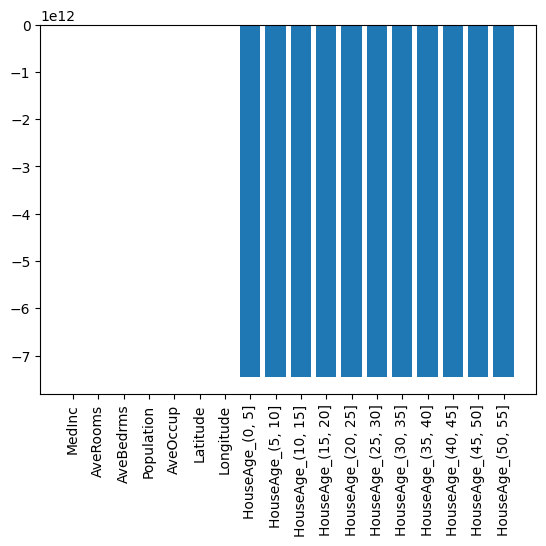

In [31]:
from matplotlib import pyplot as plt
plt.bar(x_test.columns, model.coef_.flatten())
plt.xticks(x_test.columns, rotation  = 90)

In [32]:
#Evaluation by using confusion matrix
y_hat = model.predict(scaler.transform(x_test))

In [33]:
y_hat

array([0.66992188, 1.71875   , 2.60546875, ..., 1.45605469, 1.75097656,
       1.60253906])

In [34]:
y_test

array([0.523, 0.875, 2.538, ..., 0.942, 0.862, 1.658])

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
r2_score(y_test, y_hat)

0.6008321402716792

In [37]:
mean_absolute_error(y_test, y_hat)

0.5262228470708172

([<matplotlib.axis.XTick at 0x2206fbf40d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

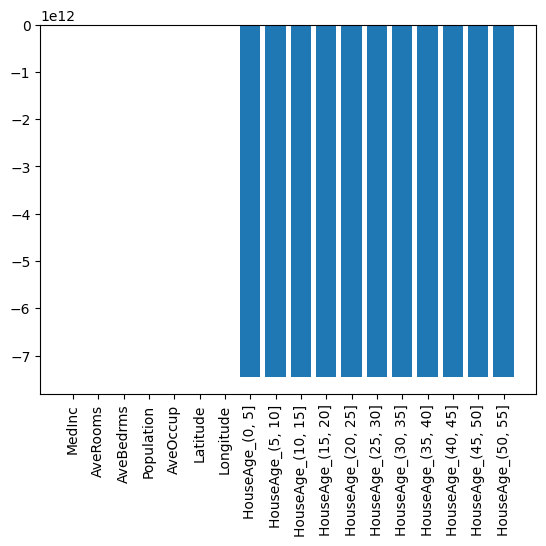

In [38]:
plt.bar(x_test.columns, model.coef_)
plt.xticks(x_test.columns, rotation=90)